In [1]:
# Imports core libraries for numerical operations and data handling
import numpy as np 
import pandas as pd 

# Imports libraries for data visualization.


import matplotlib.pyplot as plt
import seaborn as sns

# Suppresses warning messages for cleaner output.
import warnings 
warnings.filterwarnings('ignore')

# Imports preprocessing tools for encoding and scaling features.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Imports VIF function to detect multicollinearity.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Imports tools for splitting data into training and testing sets.
from sklearn.model_selection import train_test_split

# Imports a machine learning model for regression tasks
from sklearn.ensemble import RandomForestRegressor

# Imports evaluation metrics for model performance.
from sklearn.metrics import r2_score ,mean_absolute_error, mean_squared_error

In [3]:
# Loads the 'train.csv.xls' file into a DataFrame named df1.
df1=pd.read_csv('train.csv.xls')
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [4]:
# Loads the 'stores.csv.xls' file into a DataFrame named df2.
df2=pd.read_csv('stores.csv.xls')
df2

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [5]:
# Loads the 'features.csv.xls' file into a DataFrame named df3.
df3=pd.read_csv('features.csv.xls')
df3

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [6]:
# Merges df1 [train data] with df2 [store details] on the 'Store' column using an outer join to combine the data from both the dataset.
df4=pd.merge(df1,df2, on="Store" , how='outer')
df4

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315
...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221
421566,45,98,2012-10-05,628.10,False,B,118221
421567,45,98,2012-10-12,1061.02,False,B,118221
421568,45,98,2012-10-19,760.01,False,B,118221


In [7]:
# Merges df3 [features] with df4 [sales + store ] on 'Store', 'Date', and 'IsHoliday' using an outer join to form the final dataset df5.
df5=pd.merge(df3,df4 ,on=['Store','Date','IsHoliday'],how='outer')
df5

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1.0,24924.50,A,151315.0
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2.0,50605.27,A,151315.0
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3.0,13740.12,A,151315.0
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4.0,39954.04,A,151315.0
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5.0,32229.38,A,151315.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423320,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,NaN,NaN,NaN,NaN
423321,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,NaN,NaN,NaN,NaN
423322,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,NaN,NaN,NaN,NaN
423323,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,NaN,NaN,NaN,NaN


Part -> 2 Data Cleaning

In [8]:
# Displays the number of rows and columns in the dataset.
df5.shape

(423325, 16)

In [9]:
# Displays the first few rows of the dataframe
df5.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1.0,24924.50,A,151315.0
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2.0,50605.27,A,151315.0
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3.0,13740.12,A,151315.0
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4.0,39954.04,A,151315.0
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5.0,32229.38,A,151315.0


In [10]:
# Displays the last 5 rows of the df5 DataFrame to review recent or bottom entries in the dataset.
df5.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
423320,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,NaN,NaN,NaN,NaN
423321,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,NaN,NaN,NaN,NaN
423322,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,NaN,NaN,NaN,NaN
423323,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,NaN,NaN,NaN,NaN
423324,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,NaN,NaN,NaN,NaN


In [11]:
# Checks for missing values in each column of the df5 dataset by counting nulls
df5.isnull().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270892
MarkDown2       310793
MarkDown3       284667
MarkDown4       286859
MarkDown5       270138
CPI                585
Unemployment       585
IsHoliday            0
Dept              1755
Weekly_Sales      1755
Type              1755
Size              1755
dtype: int64

In [12]:
# Displays a summary of the df5 DataFrame including column names, non-null counts, and data types.
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423325 entries, 0 to 423324
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         423325 non-null  int64  
 1   Date          423325 non-null  object 
 2   Temperature   423325 non-null  float64
 3   Fuel_Price    423325 non-null  float64
 4   MarkDown1     152433 non-null  float64
 5   MarkDown2     112532 non-null  float64
 6   MarkDown3     138658 non-null  float64
 7   MarkDown4     136466 non-null  float64
 8   MarkDown5     153187 non-null  float64
 9   CPI           422740 non-null  float64
 10  Unemployment  422740 non-null  float64
 11  IsHoliday     423325 non-null  bool   
 12  Dept          421570 non-null  float64
 13  Weekly_Sales  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  float64
dtypes: bool(1), float64(12), int64(1), object(2)
memory usage: 48.8+ MB


In [13]:
# filling missing values in all MarkDown columns with 0, assuming their is no discount
df5['MarkDown1'].fillna(value=0, inplace=True)
df5['MarkDown2'].fillna(value=0, inplace=True)
df5['MarkDown3'].fillna(value=0, inplace=True)
df5['MarkDown4'].fillna(value=0, inplace=True)
df5['MarkDown5'].fillna(value=0, inplace=True)

In [14]:
# Filling missing values in the 'Weekly_Sales' column with 0, assuming no sales occurred for those records.
df5["Weekly_Sales"].fillna(value=0, inplace=True)

In [15]:
# Filling missing values in the 'CPI' column with the median value to maintain data consistency.
df5["CPI"].fillna(value=df5["CPI"].median(), inplace=True)

In [16]:
# Filling missing values in the 'Unemployment' column with the median to handle nulls.
df5["Unemployment"].fillna(value=df5["Unemployment"].median(), inplace=True)

In [17]:
# Filling missing values in the 'Size' column with the median store size to handle nulls.
df5["Size"].fillna(value=df5["Size"].median(), inplace=True)

In [18]:
# Filling missing values in the 'Dept' column with the most frequent department value (mode).
df5["Dept"].fillna(value=df5["Dept"].mode()[0] ,inplace=True)  

In [19]:
# Filling missing values in the 'Type' column with the most common store type (mode).
df5["Type"].fillna(value=df5["Type"].mode()[0], inplace=True)

In [20]:
# Re-checks for any remaining missing values in each column of the df5 DataFrame after data cleaning.
df5.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Dept            0
Weekly_Sales    0
Type            0
Size            0
dtype: int64

In [21]:
# Checks for and counts the number of duplicate rows in the df5 DataFrame.
df5.duplicated().sum()

0

In [22]:
# Generates descriptive statistics for all numeric columns in df5, such as mean, std, min, and max values.
df5.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,Size
count,423325.000000,423325.000000,423325.000000,423325.000000,423325.000000,423325.000000,423325.000000,423325.000000,423325.000000,423325.000000,423325.000000,423325.000000,423325.000000
mean,22.203860,60.067140,3.361933,2609.393788,887.229665,474.645154,1090.251506,1671.367162,171.234247,7.957170,44.080971,15915.003808,136742.173325
std,12.786244,18.452599,0.458038,6084.868435,5096.047794,5578.580578,3914.158379,4370.213498,39.142201,1.862148,30.555478,22687.307521,60854.447795
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.000000,-185.170000,126.064000,3.684000,1.000000,-4988.940000,34875.000000
25%,11.000000,46.670000,2.935000,0.000000,0.000000,0.000000,0.000000,0.000000,132.064433,6.891000,18.000000,2030.510000,93638.000000
50%,22.000000,62.070000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,37.000000,7551.220000,140167.000000
75%,33.000000,74.260000,3.738000,2876.830000,3.000000,4.720000,436.670000,2194.680000,212.416993,8.567000,72.000000,20121.920000,202505.000000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,99.000000,693099.360000,219622.000000


In [23]:
# Generates descriptive statistics for all catagorical columns in df5, such as mean, std, min, and max values.
df5.describe(include=object)

,Date,Type
count,423325,423325
unique,182,3
top,2011-12-23,A
freq,3027,217233


Exploratory Data Analysis

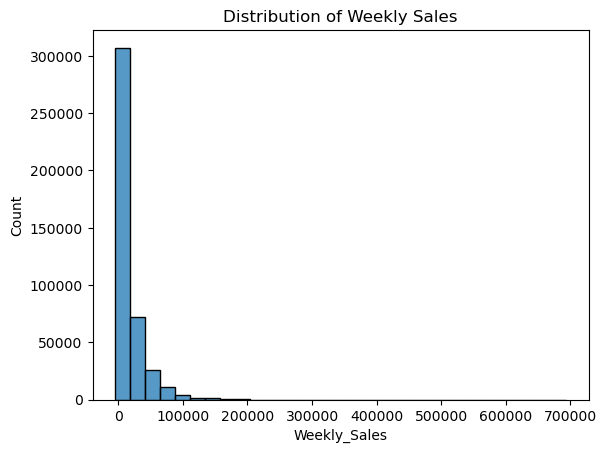

In [24]:
# Visualizing the distribution of Weekly Sales across all records.
plt.title("Distribution of Weekly Sales")
sns.histplot(df5['Weekly_Sales'], kde=False, bins=30)
plt.show()

<Axes: xlabel='Dept', ylabel='Count'>

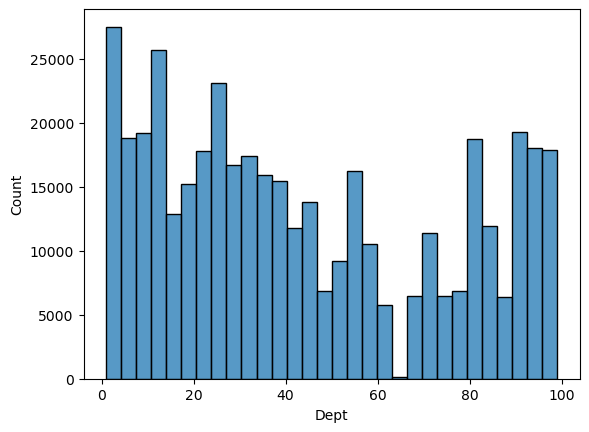

In [25]:
# Plots the frequency distribution of departments to show how sales records are spread across different departments
sns.histplot(df5['Dept'],kde=False, bins=30)


In [26]:
# Counts and displays the number of occurrences for each value in the 'IsHoliday' column to see how many records are holidays vs non-holidays.
df5.value_counts('IsHoliday')

IsHoliday
False    393529
True      29796
Name: count, dtype: int64

<Axes: ylabel='count'>

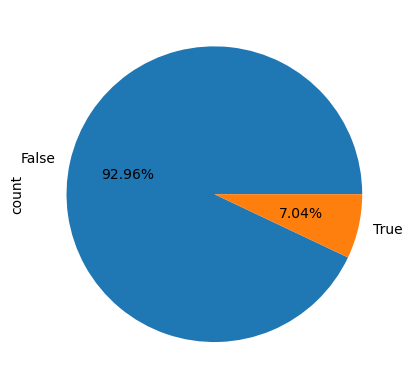

In [27]:
# Plotting a pie chart to show the distribution of holiday and non-holiday weeks in the dataset.
df5['IsHoliday'].value_counts().plot(kind="pie", autopct="%1.2f%%")

In [28]:
# Counts and displays the frequency of each store 'Type' to understand the distribution of store categories.
df5.value_counts('Type')

Type
A    217233
B    163495
C     42597
Name: count, dtype: int64

<Axes: ylabel='count'>

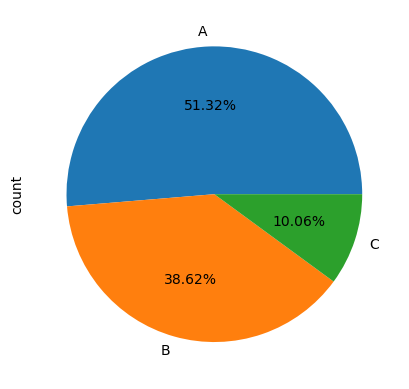

In [29]:
# Plotting a pie chart to visualize the distribution of store types in the dataset.
df5['Type'].value_counts().plot(kind="pie", autopct="%1.2f%%")

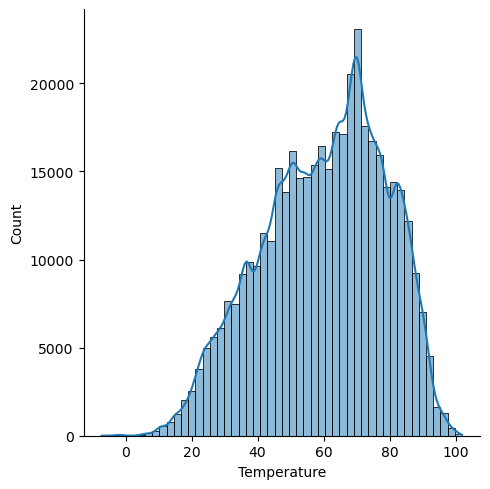

In [30]:
# Shows how temperature values are spread out to understand weather patterns in the data.
sns.displot(x='Temperature',data=df5,kde=True,bins=50)
plt.show()

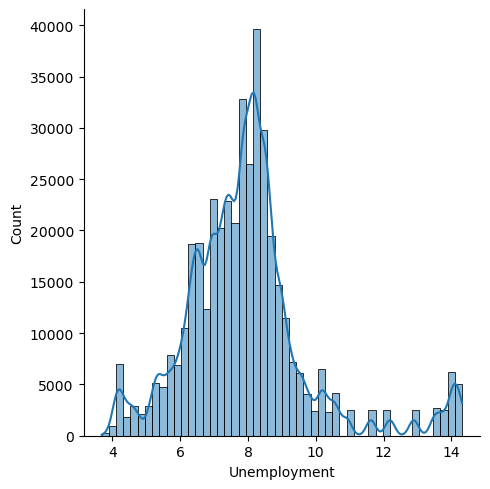

In [31]:
# Shows the distribution of unemployment rates to understand economic conditions in the data.
sns.displot(x='Unemployment',data=df5,kde=True,bins=50)
plt.show()

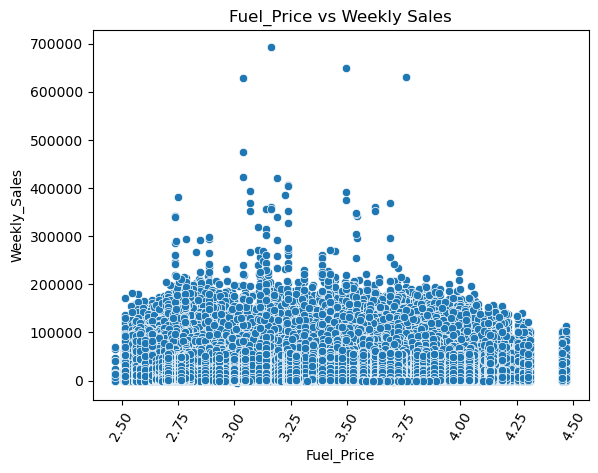

In [32]:
# Shows the relationship between fuel prices and weekly sales to see if fuel costs impact sales.
sns.scatterplot(x='Fuel_Price',y='Weekly_Sales',data=df5)
plt.title("Fuel_Price vs Weekly Sales")
plt.xticks(rotation=60)
plt.show()

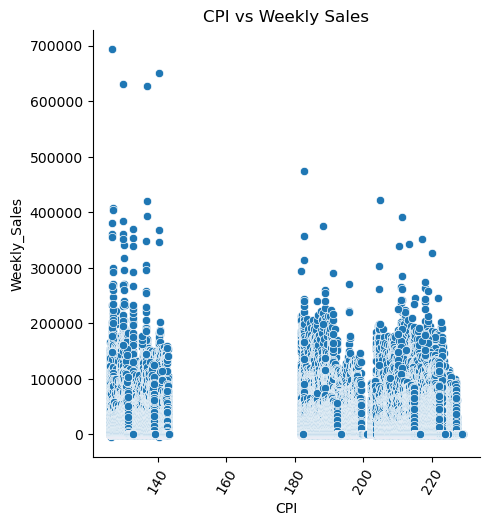

In [33]:
# Plots the relationship between CPI (inflation) and weekly sales to see if consumer prices affect sales.
sns.relplot(x='CPI',y='Weekly_Sales',data=df5)
plt.title("CPI vs Weekly Sales")
plt.xticks(rotation=60)
plt.show()

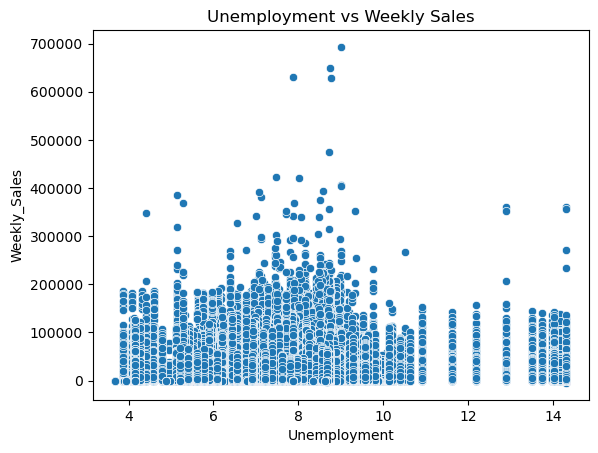

In [34]:
# Scatter plot showing the relationship between Unemployment rate and Weekly Sales
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df5)
plt.title("Unemployment vs Weekly Sales")
plt.show()

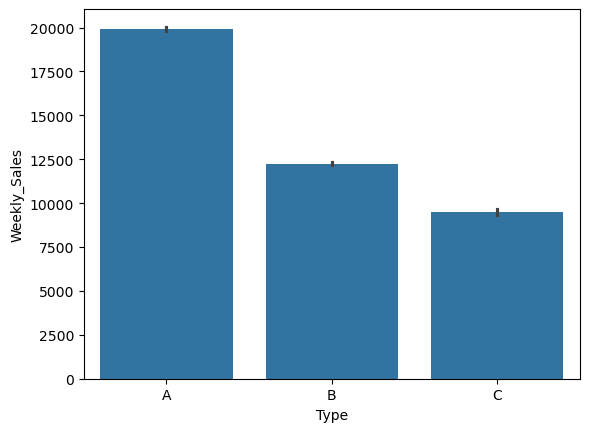

In [35]:
# Compares average weekly sales across different store types to see which type performs best.
sns.barplot(x='Type',y='Weekly_Sales',data=df5)
plt.show()

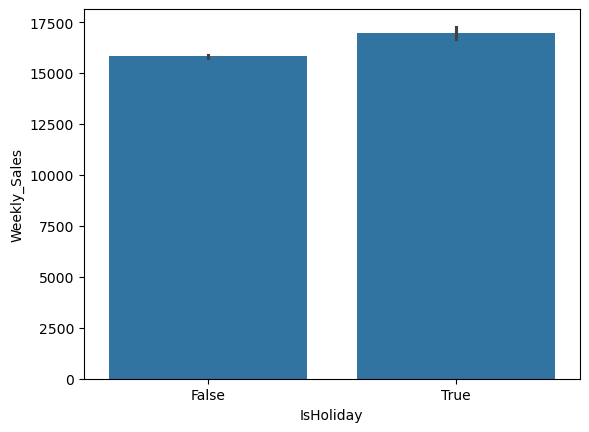

In [36]:
# Compares average weekly sales during holidays vs non-holidays to see if holidays boost sales
sns.barplot(x='IsHoliday',y='Weekly_Sales',data=df5)
plt.show()

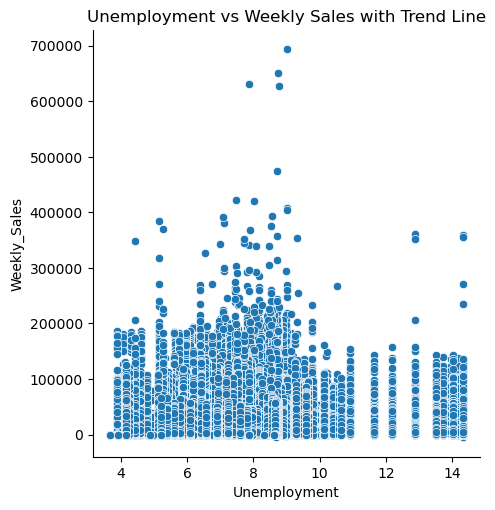

In [37]:
sns.relplot(x='Unemployment', y='Weekly_Sales', data=df5)
plt.title("Unemployment vs Weekly Sales with Trend Line")
plt.show()

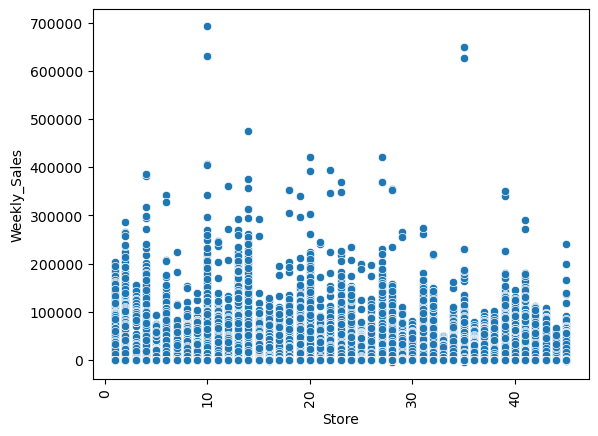

In [38]:
# Shows how weekly sales vary across different stores to identify high and low performing stores.
sns.scatterplot(x='Store',y='Weekly_Sales',data=df5)
plt.xticks(rotation=90)
plt.show()

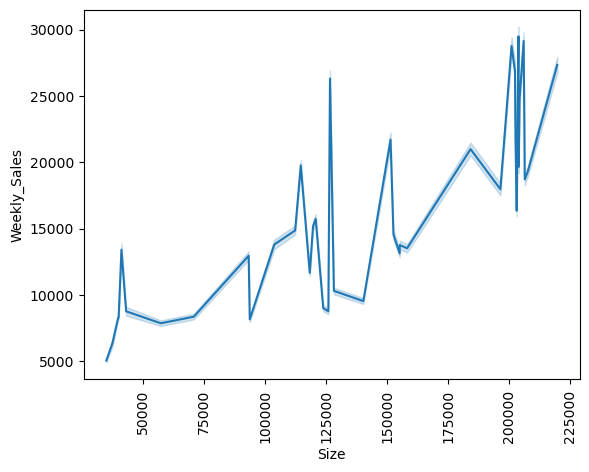

In [39]:
# Line plot visualizing how Weekly Sales vary with Store Size, with x-axis labels rotated for better readability
sns.lineplot(x='Size',y='Weekly_Sales',data=df5)
plt.xticks(rotation=90)
plt.show()

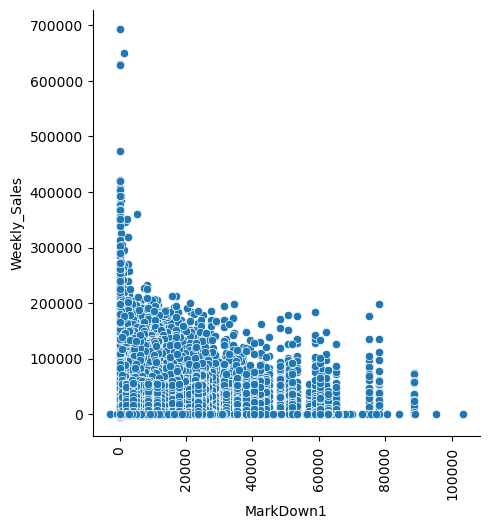

In [40]:
# Plotting a scatter plot to visualize the relationship between MarkDown1 and Weekly_Sales to see if higher discounts lead to increased sales.
sns.relplot(x='MarkDown1',y='Weekly_Sales',data=df5)
plt.xticks(rotation=90)
plt.show()

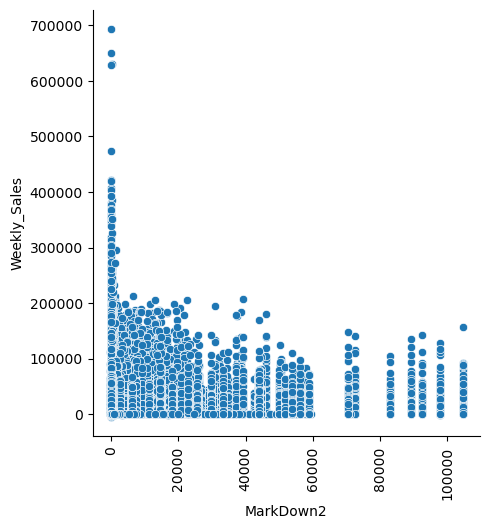

In [41]:
# Plotting a scatter plot to visualize the relationship between MarkDown2 and Weekly_Sales to see if higher discounts lead to increased sales.
sns.relplot(x='MarkDown2',y='Weekly_Sales',data=df5)
plt.xticks(rotation=90)
plt.show()

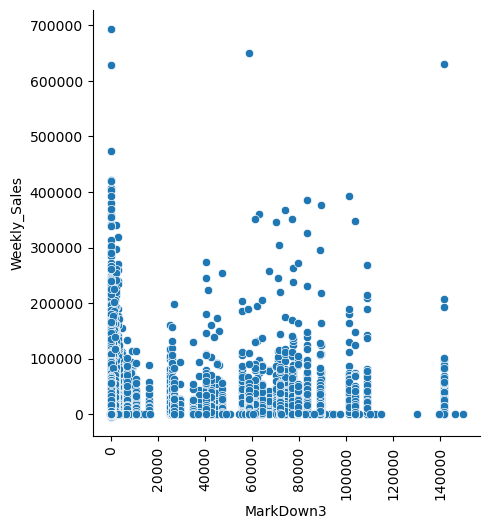

In [42]:
# Plotting a scatter plot to visualize the relationship between MarkDown3 and Weekly_Sales to see if higher discounts lead to increased sales.
sns.relplot(x='MarkDown3',y='Weekly_Sales',data=df5)
plt.xticks(rotation=90)
plt.show()

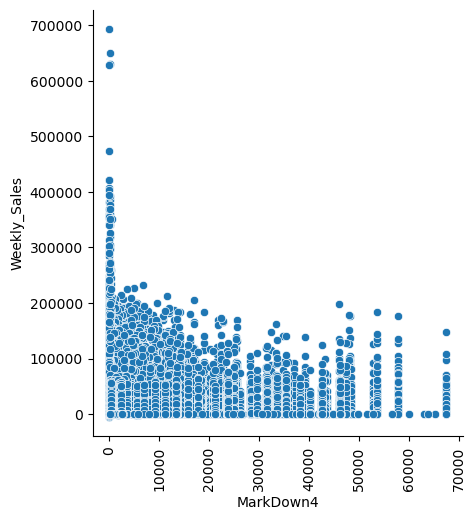

In [43]:
# Plotting a scatter plot to visualize the relationship between MarkDown4 and Weekly_Sales to see if higher discounts lead to increased sales.
sns.relplot(x='MarkDown4',y='Weekly_Sales',data=df5)
plt.xticks(rotation=90)
plt.show()

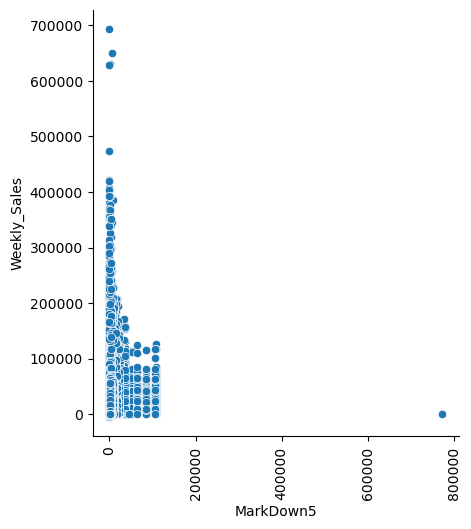

In [44]:
# Plotting a scatter plot to visualize the relationship between MarkDown5 and Weekly_Sales to see if higher discounts lead to increased sales.
sns.relplot(x='MarkDown5',y='Weekly_Sales',data=df5)
plt.xticks(rotation=90)
plt.show()

In [45]:
# Converts the 'Date' column to datetime format and stores it in a new variable called 'new'.
new=pd.to_datetime(df5['Date'])
new

0        2010-02-05
1        2010-02-05
2        2010-02-05
3        2010-02-05
4        2010-02-05
            ...    
423320   2013-06-28
423321   2013-07-05
423322   2013-07-12
423323   2013-07-19
423324   2013-07-26
Name: Date, Length: 423325, dtype: datetime64[ns]

In [46]:
# Extracts the month from the date and adds it as a new column 'Month'
df5['Month']=new.dt.month

In [47]:
# Extracts the day of the week (0=Monday, 6=Sunday) and adds it as a new column 'Day'.
df5['Day']=new.dt.dayofweek


In [48]:
# Maps numeric day values (0–6) to weekday names (Mon–Sun) for better readability in the 'Day' column.
day={
    0:'Mon',1:'Tue',2:'Wed',3:'Thr',4:'Fri',5:'Sat',6:'Sun'
}
df5['Day']=df5['Day'].map(day)


In [49]:
df5.value_counts('Month')

Month
4     41512
7     41160
3     38676
10    38362
9     38339
6     38317
8     38169
2     35706
5     35539
12    29982
11    23838
1     23725
Name: count, dtype: int64

In [50]:
# Maps numeric month values (1–12) to month names (Jan–Dec) for better readability in the 'Month' column.
month={
    1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'
}
df5['Month']=df5['Month'].map(month)
    

In [51]:
# Displays the first 5 rows of the updated DataFrame to confirm new columns like 'Day' and 'Month' were added correctly.
df5.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Month,Day
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1.0,24924.50,A,151315.0,Feb,Fri
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2.0,50605.27,A,151315.0,Feb,Fri
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3.0,13740.12,A,151315.0,Feb,Fri
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4.0,39954.04,A,151315.0,Feb,Fri
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5.0,32229.38,A,151315.0,Feb,Fri


In [52]:
df5.value_counts('Day')

Day
Fri    423325
Name: count, dtype: int64

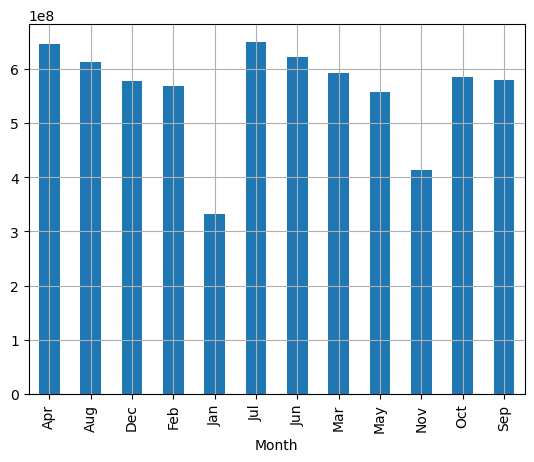

In [53]:
#Plots the total weekly sales for each month as a bar chart to visualize monthly sales trends.
df5.groupby('Month').sum()['Weekly_Sales'].plot(kind='bar')
plt.grid()

In [54]:
df5.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Month,Day
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1.0,24924.50,A,151315.0,Feb,Fri
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2.0,50605.27,A,151315.0,Feb,Fri
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3.0,13740.12,A,151315.0,Feb,Fri
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4.0,39954.04,A,151315.0,Feb,Fri
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5.0,32229.38,A,151315.0,Feb,Fri


<Axes: xlabel='CPI', ylabel='Weekly_Sales'>

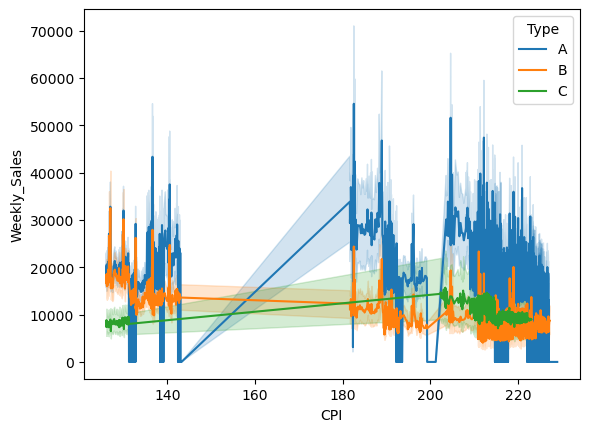

In [54]:
# Line plot showing the relationship between CPI and Weekly Sales for each Store Type
sns.lineplot(x='CPI', y='Weekly_Sales', hue='Type', data=df5)

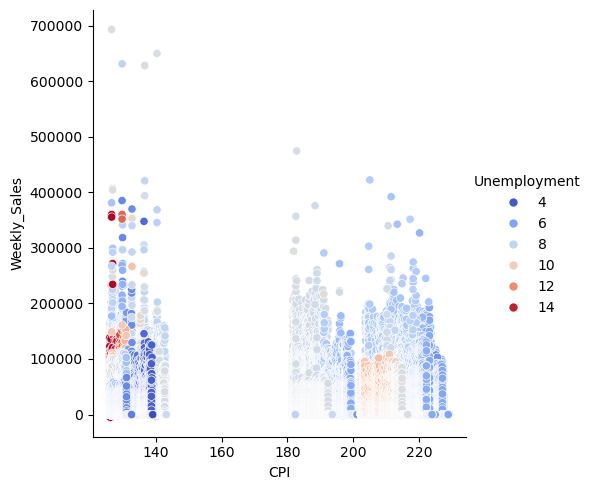

In [55]:
# Relational plot showing CPI vs Weekly Sales, colored by Unemployment using the 'coolwarm' palette
sns.relplot(x='CPI', y='Weekly_Sales', hue='Unemployment',palette='coolwarm', data=df5)


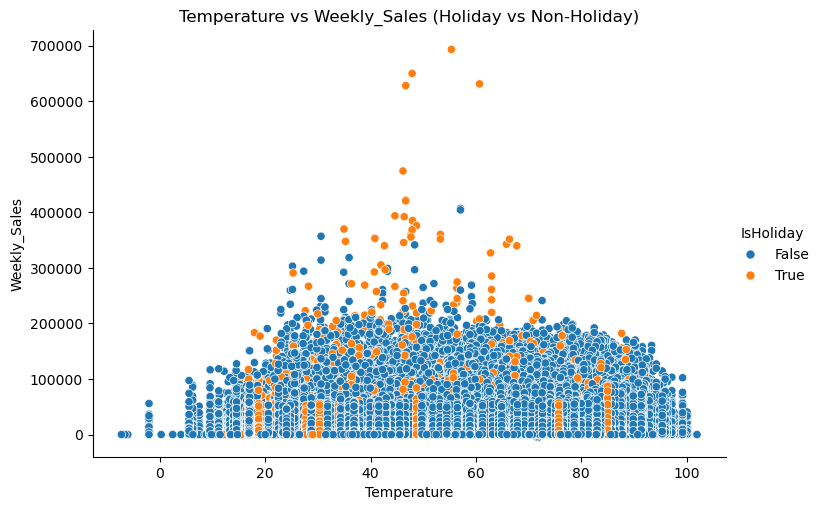

In [56]:
# Scatter plot showing the relationship between Temperature and Weekly Sales, differentiated by Holiday status
sns.relplot(x='Temperature',y='Weekly_Sales',hue='IsHoliday', data=df5,kind='scatter',height=5,aspect=1.5)
plt.title("Temperature vs Weekly_Sales (Holiday vs Non-Holiday)")
plt.show()

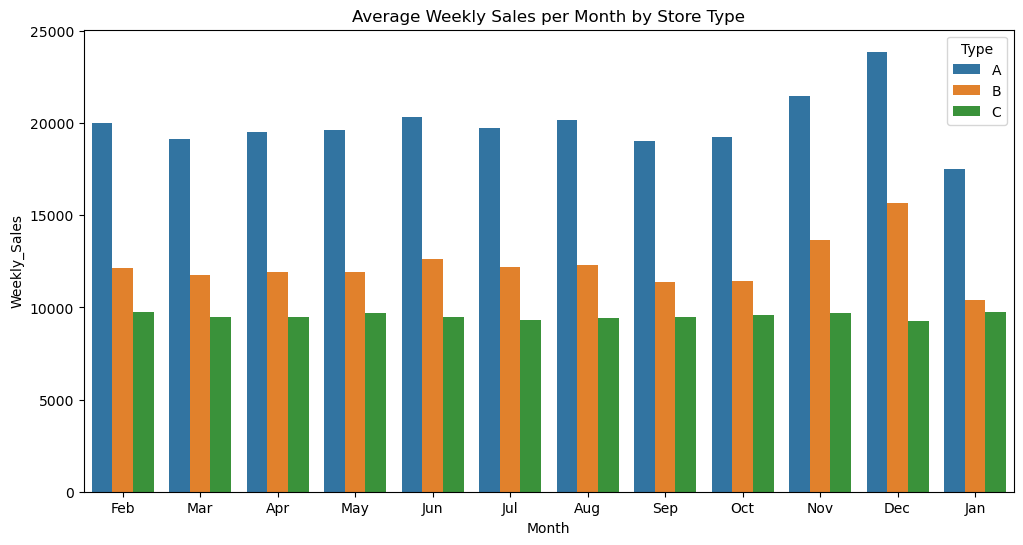

In [57]:
# Bar plot showing average Weekly Sales per Month, grouped by Store Type
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Weekly_Sales', hue='Type', data=df5, ci=None)
plt.title("Average Weekly Sales per Month by Store Type")
plt.show()

In [58]:
# List of numerical columns selected for plotting
num=["Store","Temperature","Fuel_Price","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","CPI","Unemployment","Dept","Weekly_Sales","Size"]

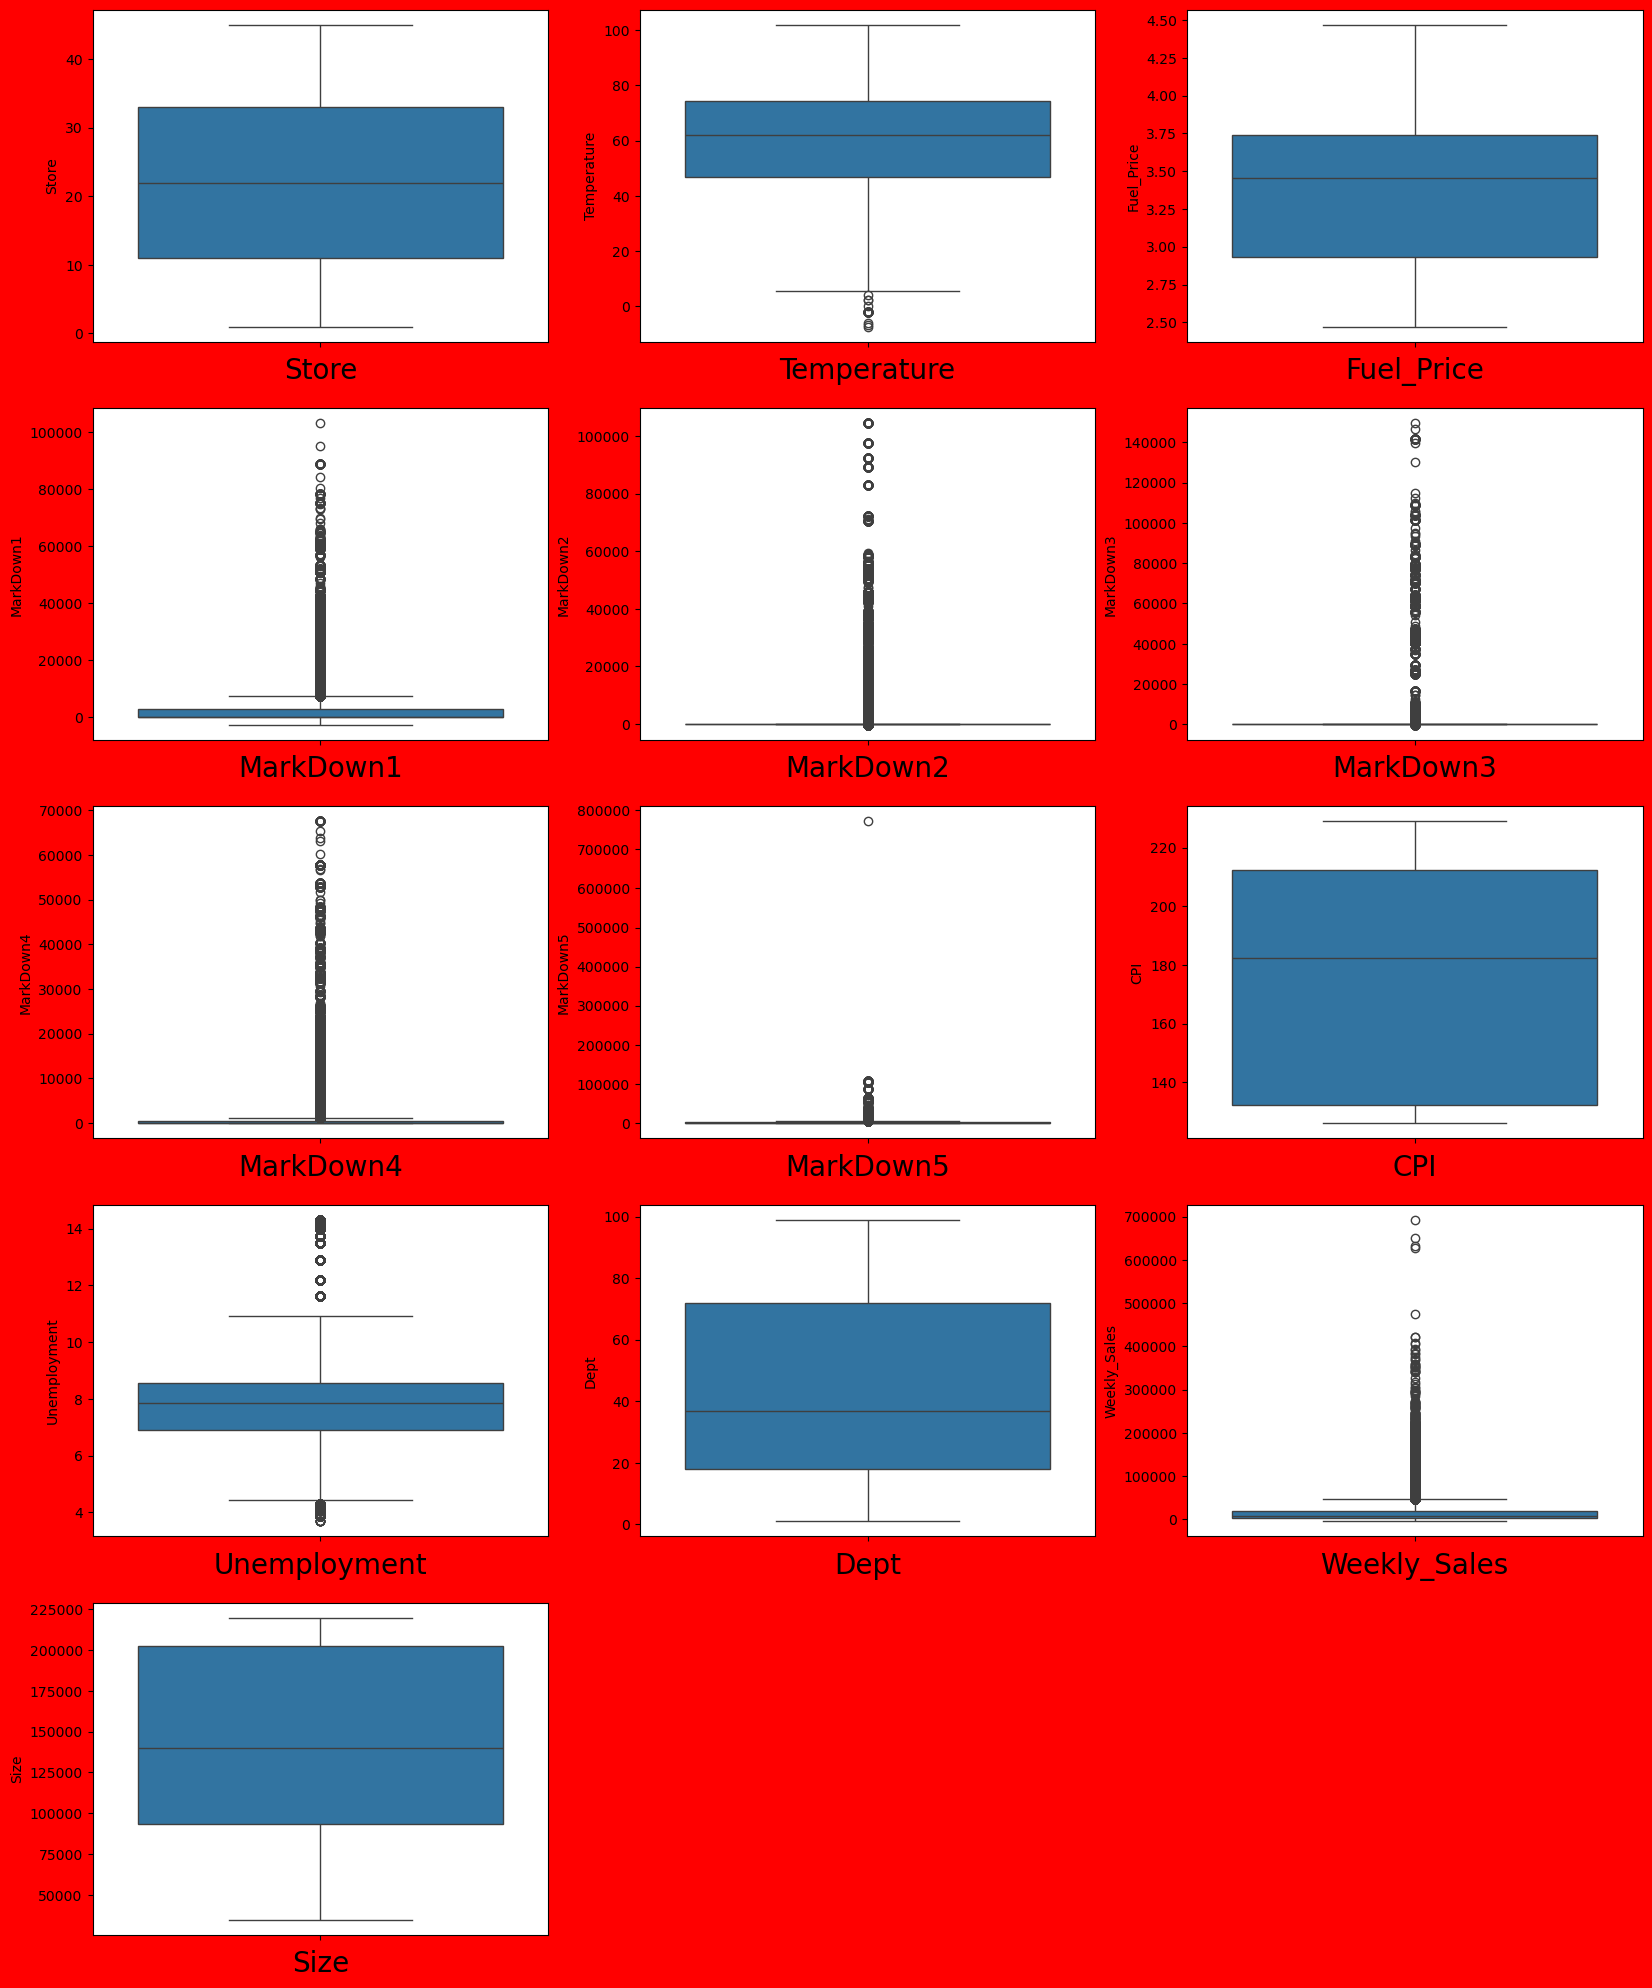

In [59]:
# Plots boxplots for all numerical columns to detect outliers and understand data spread.
plt.figure(figsize=(20,25), facecolor='red')
plotnumber =1
for column in num:
    if plotnumber <=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(df5[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [60]:
# Applies cube root transformation to MarkDown features to reduce skewness and handle extreme values.
df5[["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]] = np.cbrt(df5[["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]])
df5[["MarkDown2", "MarkDown3"]] = np.cbrt(df5[["MarkDown2", "MarkDown3"]])

In [61]:
# Checks if the data in each numeric column is balanced or (skewed).
df5[num].skew()

Store           0.077449
Temperature    -0.320460
Fuel_Price     -0.108876
MarkDown1       1.147213
MarkDown2       1.412604
MarkDown3       1.185543
MarkDown4       1.760575
MarkDown5       1.009825
CPI             0.084168
Unemployment    1.182331
Dept            0.360365
Weekly_Sales    3.266063
Size           -0.327223
dtype: float64

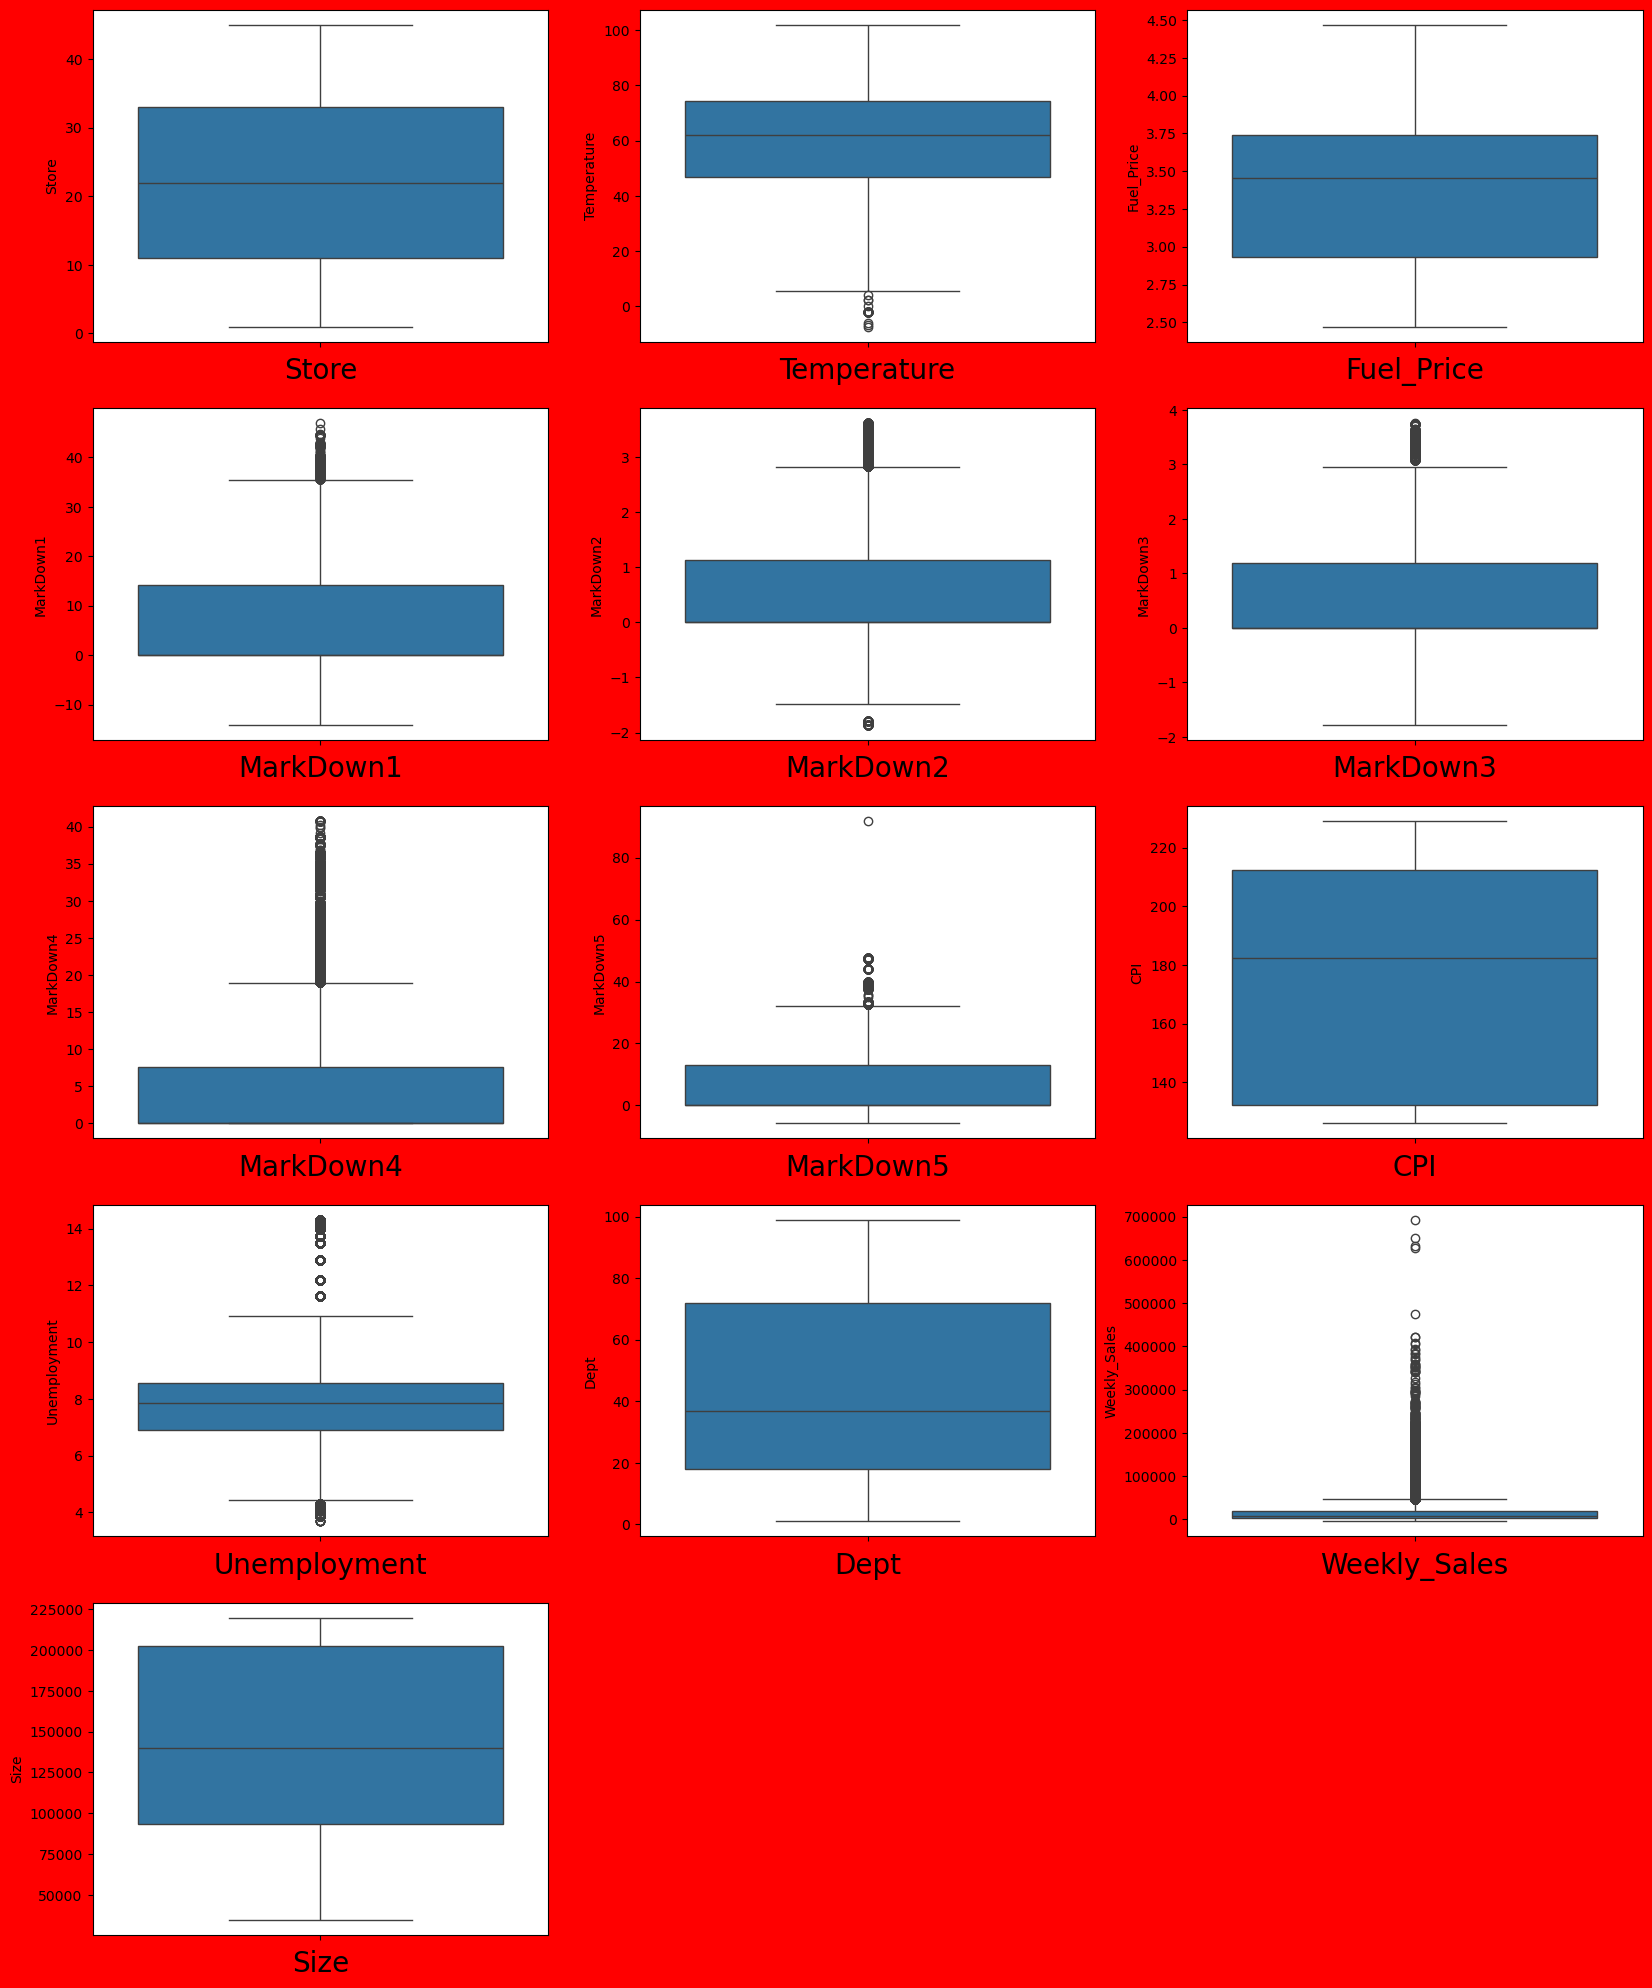

In [62]:
# Plots boxplots for all numerical columns to detect outliers and understand data spread.
plt.figure(figsize=(20,25), facecolor='red')
plotnumber =1
for column in num:
    if plotnumber <=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(df5[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [63]:
# Checks if the data in each numeric column is balanced or (skewed).
df5[num].skew()

Store           0.077449
Temperature    -0.320460
Fuel_Price     -0.108876
MarkDown1       1.147213
MarkDown2       1.412604
MarkDown3       1.185543
MarkDown4       1.760575
MarkDown5       1.009825
CPI             0.084168
Unemployment    1.182331
Dept            0.360365
Weekly_Sales    3.266063
Size           -0.327223
dtype: float64

In [64]:
# Applies log transformation to reduce the effect of large unemployment values and make the data more normal.
df5['Unemployment']=np.log1p(df5['Unemployment'])

In [65]:
# Prints the minimum weekly sales value to identify the lowest sales record in the dataset.
df5["Weekly_Sales"].min()

-4988.94

In [66]:
# Removes rows where weekly sales are negative, keeping only valid (non-negative) sales data.
df5 = df5[df5["Weekly_Sales"] >= 0]
df5

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Month,Day
0,1,2010-02-05,42.31,2.572,0.000000,0.000000,0.000000,0.000000,0.000000,211.096358,2.208934,False,1.0,24924.50,A,151315.0,Feb,Fri
1,1,2010-02-05,42.31,2.572,0.000000,0.000000,0.000000,0.000000,0.000000,211.096358,2.208934,False,2.0,50605.27,A,151315.0,Feb,Fri
2,1,2010-02-05,42.31,2.572,0.000000,0.000000,0.000000,0.000000,0.000000,211.096358,2.208934,False,3.0,13740.12,A,151315.0,Feb,Fri
3,1,2010-02-05,42.31,2.572,0.000000,0.000000,0.000000,0.000000,0.000000,211.096358,2.208934,False,4.0,39954.04,A,151315.0,Feb,Fri
4,1,2010-02-05,42.31,2.572,0.000000,0.000000,0.000000,0.000000,0.000000,211.096358,2.208934,False,5.0,32229.38,A,151315.0,Feb,Fri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423320,45,2013-06-28,76.05,3.639,16.918048,2.148390,1.129831,13.480942,14.689452,182.350989,2.182224,False,1.0,0.00,A,140167.0,Jun,Fri
423321,45,2013-07-05,77.50,3.614,20.870312,2.359726,2.028967,17.964405,11.484996,182.350989,2.182224,False,1.0,0.00,A,140167.0,Jul,Fri
423322,45,2013-07-12,79.37,3.614,15.591125,2.303688,1.639785,9.064719,12.907349,182.350989,2.182224,False,1.0,0.00,A,140167.0,Jul,Fri
423323,45,2013-07-19,82.84,3.737,14.360517,2.165473,1.805804,7.133492,10.194397,182.350989,2.182224,False,1.0,0.00,A,140167.0,Jul,Fri


In [67]:
# Applies log transformation to the target variable (Weekly_Sales) to make it easier for models to learn.
df5["Weekly_Sales"] = np.log1p(df5["Weekly_Sales"])

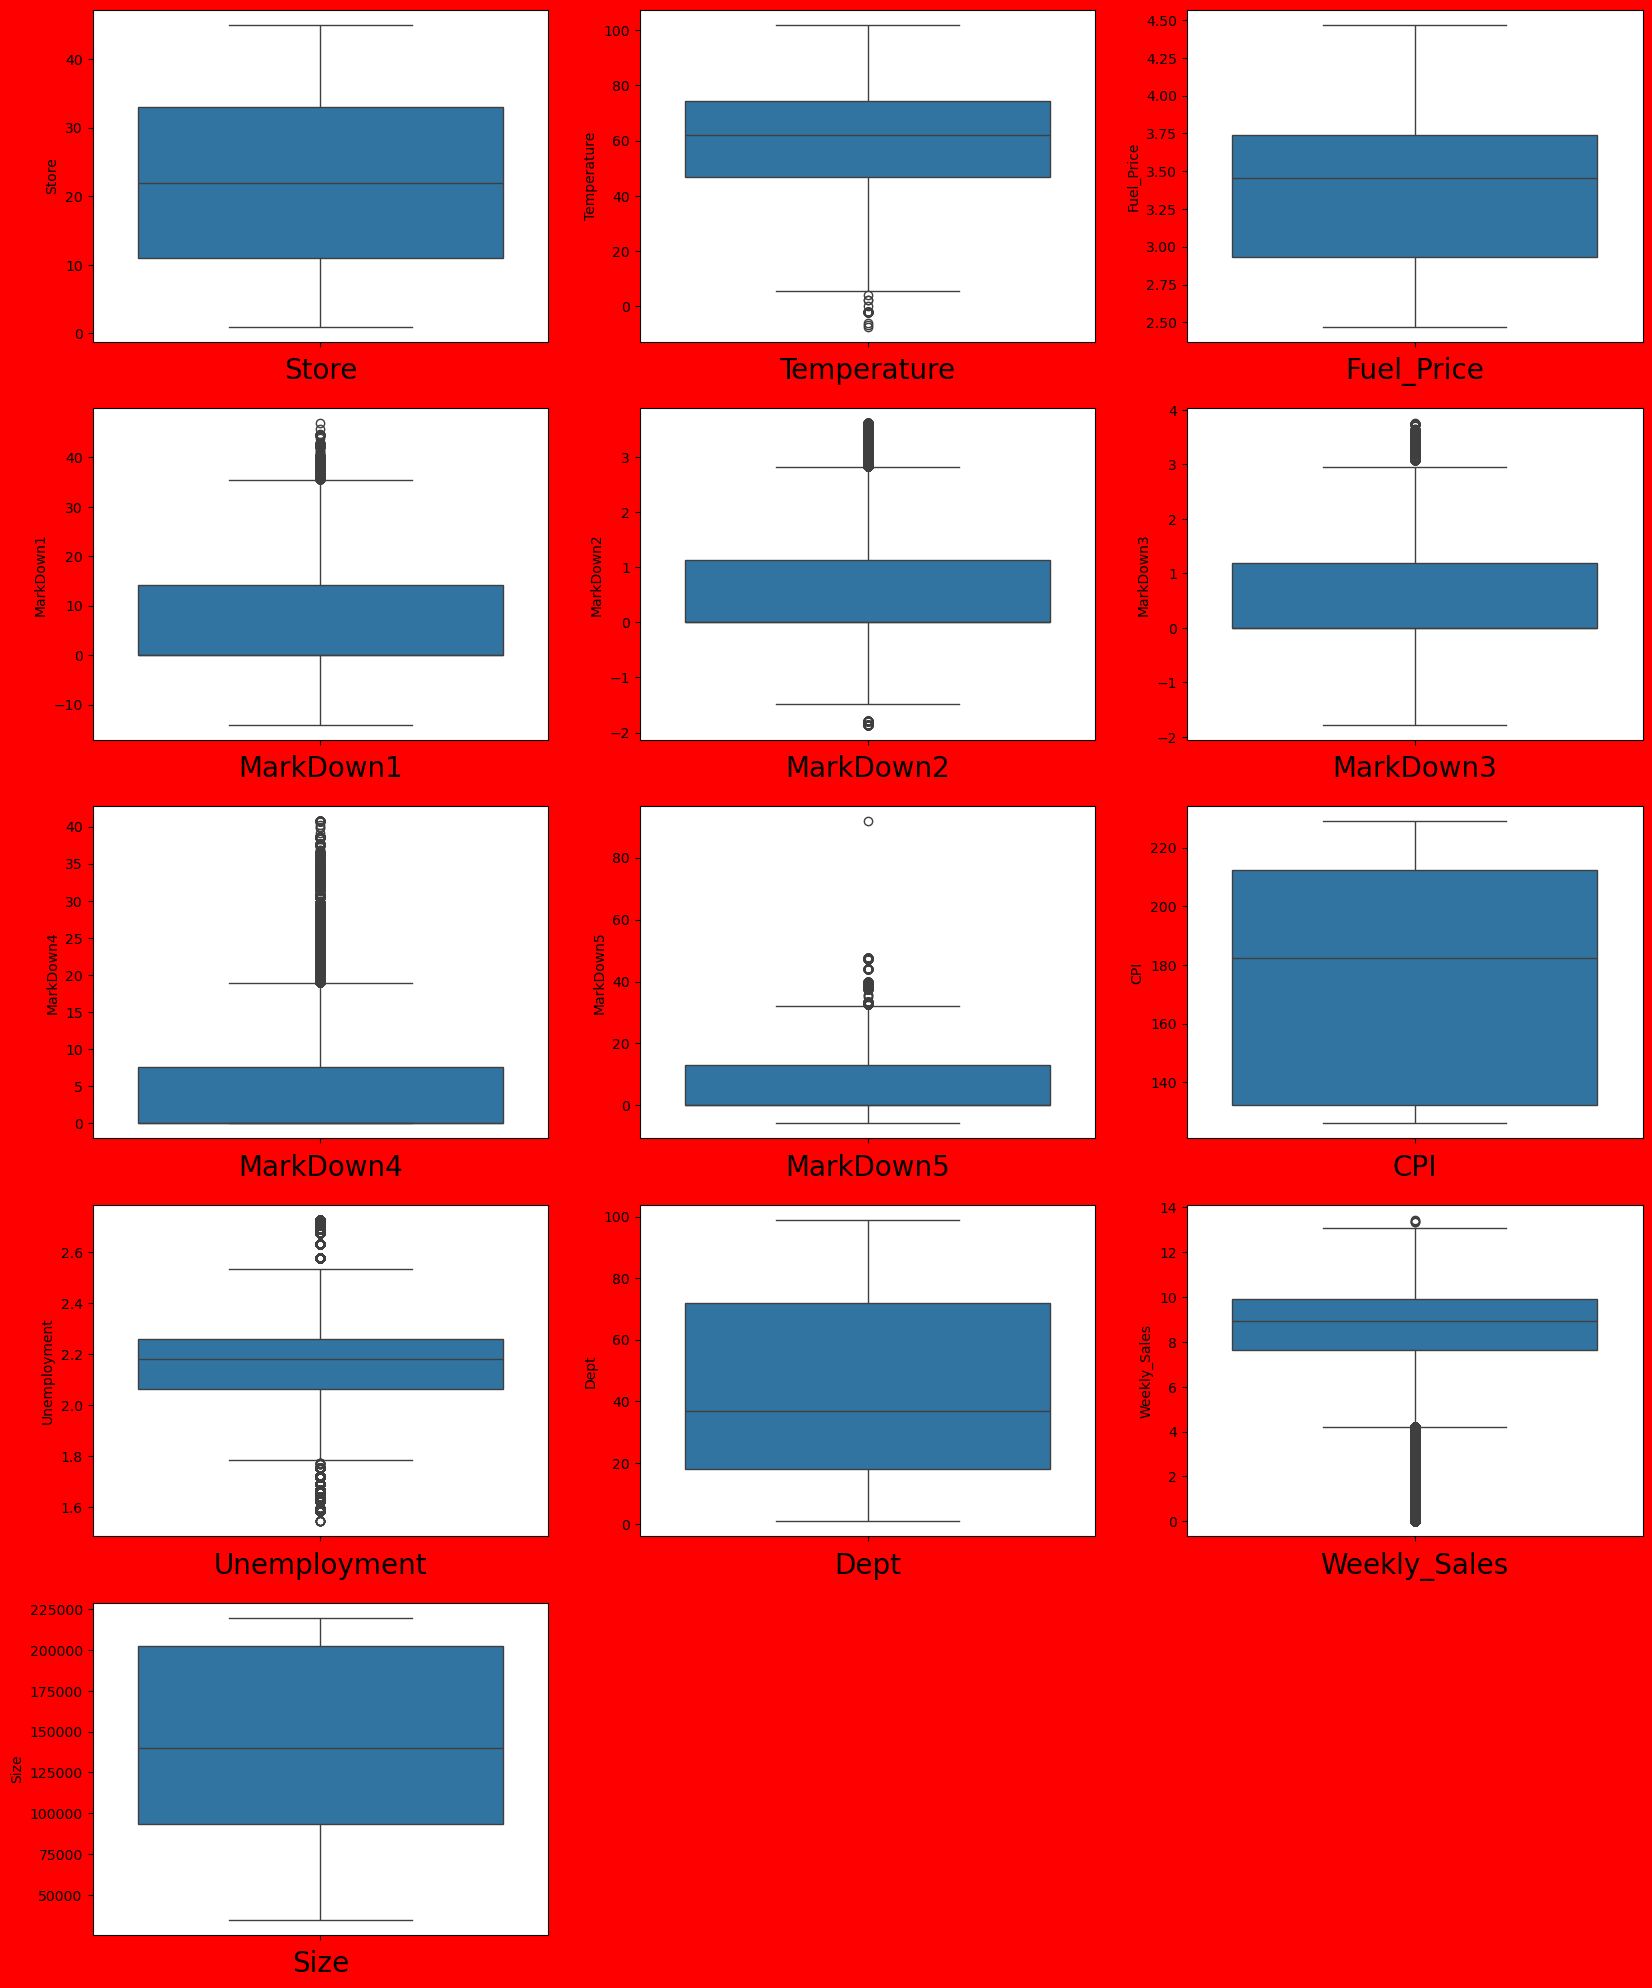

In [68]:
# Plots boxplots for all numerical columns to detect outliers and understand data spread.
plt.figure(figsize=(20,25), facecolor='red')
plotnumber =1
for column in num:
    if plotnumber <=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(df5[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [69]:
# Checks if the data in each numeric column is balanced or (skewed).
df5[num].skew()

Store           0.077682
Temperature    -0.320313
Fuel_Price     -0.108646
MarkDown1       1.147457
MarkDown2       1.412411
MarkDown3       1.185798
MarkDown4       1.760889
MarkDown5       1.009898
CPI             0.083626
Unemployment    0.198587
Dept            0.361094
Weekly_Sales   -1.317041
Size           -0.328049
dtype: float64

In [70]:
# Displays the first 5 rows of the DataFrame to get a quick overview of the dataset's structure and values.
df5.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Month,Day
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,2.208934,False,1.0,10.123647,A,151315.0,Feb,Fri
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,2.208934,False,2.0,10.831831,A,151315.0,Feb,Fri
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,2.208934,False,3.0,9.528148,A,151315.0,Feb,Fri
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,2.208934,False,4.0,10.595510,A,151315.0,Feb,Fri
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,2.208934,False,5.0,10.380665,A,151315.0,Feb,Fri


In [71]:
# Creates a LabelEncoder object to convert categorical labels into numeric format.
lab_enc=LabelEncoder()

In [72]:
# Converts the 'IsHoliday' column from boolean to integer (True=1, False=0) for modeling purposes.
df5['IsHoliday'] = df5['IsHoliday'].astype(int)


In [73]:
# Applies label encoding to the 'IsHoliday' column and stores the result in Lab_Holi.
Lab_Holi=lab_enc.fit_transform(df5['IsHoliday'])
Lab_Holi

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [74]:
# Converts the 'Type' column into numeric labels using label encoding and stores it in Lab_Type.
Lab_Type=lab_enc.fit_transform(df5['Type'])
Lab_Type

array([0, 0, 0, ..., 0, 0, 0])

In [75]:
# Replaces the original 'IsHoliday' column with its label-encoded numeric values.
df5['IsHoliday']=Lab_Holi

In [76]:
# Replaces the original 'Type' column with its label-encoded numeric values.
df5['Type']=Lab_Type

In [77]:
# Displays summary information about the DataFrame, including column names, data types, and non-null counts.
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 422040 entries, 0 to 423324
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         422040 non-null  int64  
 1   Date          422040 non-null  object 
 2   Temperature   422040 non-null  float64
 3   Fuel_Price    422040 non-null  float64
 4   MarkDown1     422040 non-null  float64
 5   MarkDown2     422040 non-null  float64
 6   MarkDown3     422040 non-null  float64
 7   MarkDown4     422040 non-null  float64
 8   MarkDown5     422040 non-null  float64
 9   CPI           422040 non-null  float64
 10  Unemployment  422040 non-null  float64
 11  IsHoliday     422040 non-null  int64  
 12  Dept          422040 non-null  float64
 13  Weekly_Sales  422040 non-null  float64
 14  Type          422040 non-null  int32  
 15  Size          422040 non-null  float64
 16  Month         422040 non-null  object 
 17  Day           422040 non-null  object 
dtypes: float6

In [78]:
# Drops the 'Date', 'Day', and 'Month' columns from the DataFrame as they are no longer needed.
df5.drop(['Date','Day','Month'],axis=1,inplace=True)

In [79]:
# Calculates the correlation matrix for all numerical columns in the DataFrame.
corr=df5.corr()

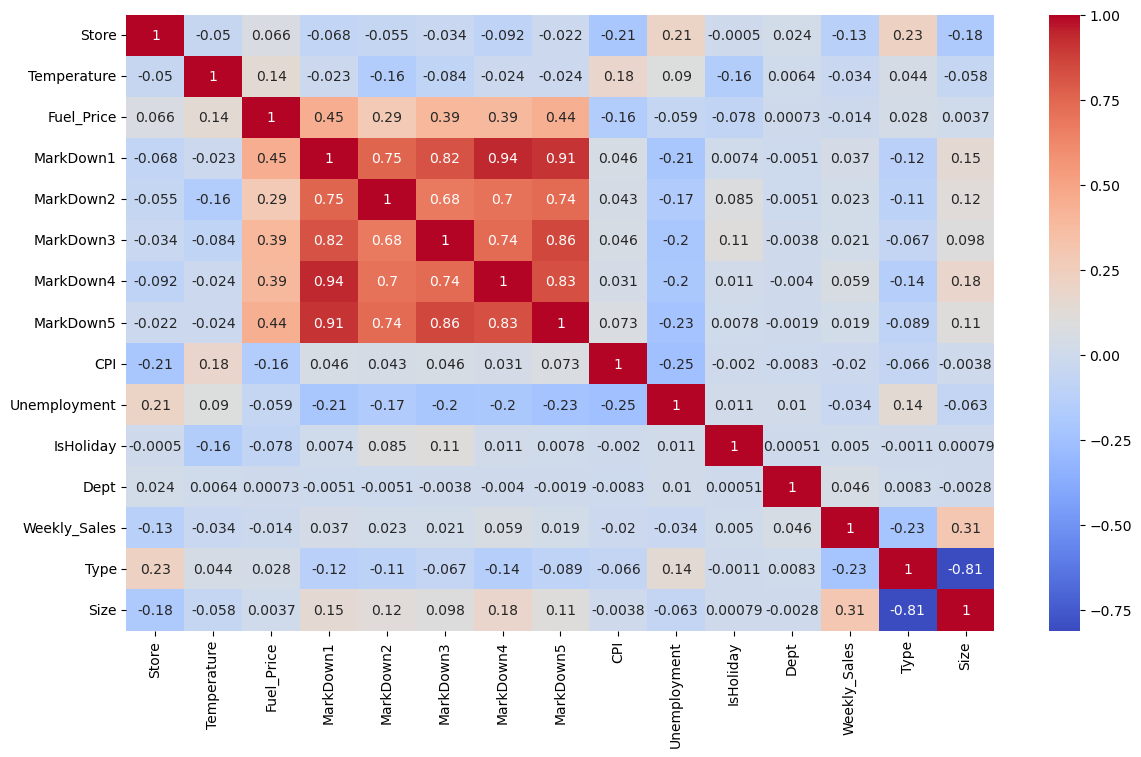

In [80]:
# Plots a heatmap to visualize the correlation between numerical features, making it easier to spot strong relationships.
plt.figure(figsize=(14,8)) 
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [81]:
# Assigns the target variable 'Weekly_Sales' to the variable y for model training.
y=df5['Weekly_Sales']
y

0         10.123647
1         10.831831
2          9.528148
3         10.595510
4         10.380665
            ...    
423320     0.000000
423321     0.000000
423322     0.000000
423323     0.000000
423324     0.000000
Name: Weekly_Sales, Length: 422040, dtype: float64

In [82]:
# Creates the feature set 'x' by dropping less relevant features (MarkDowns) and the target column 'Weekly_Sales'.
x=df5.drop(['MarkDown3','MarkDown2','MarkDown1','MarkDown4','MarkDown5','Weekly_Sales'],axis=1)
x

,Store,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Type,Size
0,1,42.31,2.572,211.096358,2.208934,0,1.0,0,151315.0
1,1,42.31,2.572,211.096358,2.208934,0,2.0,0,151315.0
2,1,42.31,2.572,211.096358,2.208934,0,3.0,0,151315.0
3,1,42.31,2.572,211.096358,2.208934,0,4.0,0,151315.0
4,1,42.31,2.572,211.096358,2.208934,0,5.0,0,151315.0
...,...,...,...,...,...,...,...,...,...
423320,45,76.05,3.639,182.350989,2.182224,0,1.0,0,140167.0
423321,45,77.50,3.614,182.350989,2.182224,0,1.0,0,140167.0
423322,45,79.37,3.614,182.350989,2.182224,0,1.0,0,140167.0
423323,45,82.84,3.737,182.350989,2.182224,0,1.0,0,140167.0


In [83]:
#Here we use StandardScaler function to standardize data values into a standard format

In [84]:
# Initializes the StandardScaler to standardize features by removing the mean and scaling to unit variance.
scaler=StandardScaler()

In [85]:
# Fits the scaler to the feature set 'x' and transforms it to produce the standardized feature set 'x_scaled'.
x_scaled=scaler.fit_transform(x)

In [86]:
# Displays the standardized feature set after applying StandardScaler.
x_scaled

array([[-1.65769385, -0.96231301, -1.72428273, ..., -1.4086404 ,
        -0.88134179,  0.2390695 ],
       [-1.65769385, -0.96231301, -1.72428273, ..., -1.37592921,
        -0.88134179,  0.2390695 ],
       [-1.65769385, -0.96231301, -1.72428273, ..., -1.34321802,
        -0.88134179,  0.2390695 ],
       ...,
       [ 1.78299394,  1.04604135,  0.55060551, ..., -1.4086404 ,
        -0.88134179,  0.05591325],
       [ 1.78299394,  1.23408748,  0.81913839, ..., -1.4086404 ,
        -0.88134179,  0.05591325],
       [ 1.78299394,  0.86666594,  0.96541239, ..., -1.4086404 ,
        -0.88134179,  0.05591325]])

In [87]:
#Here Variance inflation factor is used to detect and measure multicollinearity in regression analysis

In [88]:
# Creates an empty DataFrame to store Variance Inflation Factor (VIF) values for checking multicollinearity.
vif=pd.DataFrame()

In [89]:
# Calculates the Variance Inflation Factor (VIF) for each feature to detect multicollinearity and stores it in the 'vif' column.
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [90]:
# Adds the corresponding feature names to the VIF DataFrame for better readability.
vif['Features']=x.columns

In [91]:
# Prints the VIF DataFrame to show multicollinearity scores for each feature.
vif

,vif,Features
0,1.127168,Store
1,1.129801,Temperature
2,1.089416,Fuel_Price
3,1.207605,CPI
4,1.162325,Unemployment
5,1.029433,IsHoliday
6,1.000713,Dept
7,3.038092,Type
8,2.967078,Size


In [92]:
#Train Test Split

In [93]:
# Splits the dataset into training and testing sets with 70% for training and 30% for testing using a fixed random state.
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=100)

In [94]:
# Displays the training feature set after the train-test split.
x_train

array([[-0.40653465, -0.82629117,  0.95013003, ...,  1.40452197,
         0.6199255 , -0.71592897],
       [-0.9539168 ,  1.54460747,  0.94139726, ..., -0.49272707,
         0.6199255 , -0.16843178],
       [ 0.06265005,  0.63689199,  0.58335343, ...,  1.6335003 ,
         0.6199255 , -0.36524096],
       ...,
       [-0.0155474 , -1.80283045, -0.28337463, ..., -0.29645993,
         0.6199255 , -0.28269907],
       [-1.2667066 , -0.50113936, -0.44711419, ...,  0.97927649,
        -0.88134179,  1.08009642],
       [ 0.68822965, -0.01449548, -0.14146701, ..., -1.34321802,
        -0.88134179,  1.10055116]])

In [95]:
# Initializes a Random Forest Regressor model with a maximum tree depth of 15 and a fixed random state for reproducibility.
model = RandomForestRegressor(max_depth=15, random_state=42)

In [96]:
# Trains the Random Forest Regressor model using the training data.
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, random_state=42)

In [97]:
# Uses the trained model to predict target values on the training data and stores the predictions in y_predict.
y_predict = model.predict(x_train)
y_predict


array([9.73543593, 8.7044802 , 4.47522199, ..., 8.10843515, 9.92946113,
       9.01530031])

In [98]:
# Uses the trained model to make predictions on the test data and stores them in x_predict.
x_predict=model.predict(x_test)
x_predict

array([ 8.98678692,  9.59570157, 10.00344412, ...,  7.03397441,
        6.11647721,  7.86242364])

In [99]:
# Calculates the R² score (coefficient of determination) for the model's predictions on the training set.
r2_score(y_train,y_predict)

0.96400120945451

In [100]:
# Calculates the R² score for the model’s predictions on the test data to evaluate generalization performance.
r2_score(y_test,x_predict)

0.9497707606518319

In [101]:
# Calculates the Mean Absolute Error (MAE) to measure the average magnitude of errors in test predictions.
mean_absolute_error(y_test,x_predict)

0.2623560546737765

In [102]:
# Calculates the Mean Squared Error (MSE) to measure the average squared difference between predicted and actual values on the test set.
mean_squared_error(y_test,x_predict)

0.21907982276020496